In [6]:
import numpy as np         #numpy is used for most of the mathematical (as np ables us to use it as a shortcut)
import matplotlib.pyplot as plt     # for charts and graphs
import pandas as pd

dataset = pd.read_csv('/kaggle/input/imdb-dataset-2024-updated/IMDb_Dataset.csv')   

dataset.head()

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Duration (minutes)
0,Gladiator,8.5,2000,R,Action,Ridley Scott,David FranzoniJohn LoganWilliam Nicholson,67.0,155.0
1,Mission: Impossible - Dead Reckoning Part One,7.7,2023,PG-13,Action,Christopher McQuarrie,Tom CruiseHayley AtwellVing Rhames,81.0,163.0
2,Rebel Moon - Part Two: The Scargiver,5.2,2024,PG-13,Action,Zack Snyder,Zack SnyderKurt JohnstadShay Hatten,35.0,122.0
3,Inglourious Basterds,8.4,2009,R,Adventure,Quentin Tarantino,Brad PittDiane KrugerEli Roth,69.0,153.0
4,Borderlands,7.1,2024,R,Action,Eli Roth,Eli RothJoe Crombie,66.9,116.3


In [8]:
def get_df_info(df):
    print("\n\033[1mShape of DataFrame:\033[0m ", df.shape)
    print("\n\033[1mColumns in DataFrame:\033[0m ", df.columns.to_list())
    print("\n\033[1mData types of columns:\033[0m\n", df.dtypes)
    
    print("\n\033[1mInformation about DataFrame:\033[0m")
    df.info()
    
    print("\n\033[1mNumber of unique values in each column:\033[0m")
    for col in df.columns:
        print(f"\033[1m{col}\033[0m: {df[col].nunique()}")
        
    print("\n\033[1mNumber of null values in each column:\033[0m\n", df.isnull().sum())
    
    print("\n\033[1mNumber of duplicate rows:\033[0m ", df.duplicated().sum())
    
    print("\n\033[1mDescriptive statistics of DataFrame:\033[0m\n", df.describe().transpose())

# Call the function
get_df_info(dataset)


Shape of DataFrame:  (400, 9)

Columns in DataFrame:  ['Title', 'IMDb Rating', 'Year', 'Certificates', 'Genre', 'Director', 'Star Cast', 'MetaScore', 'Duration (minutes)']

Data types of columns:
 Title                  object
IMDb Rating           float64
Year                    int64
Certificates           object
Genre                  object
Director               object
Star Cast              object
MetaScore             float64
Duration (minutes)    float64
dtype: object

Information about DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               400 non-null    object 
 1   IMDb Rating         400 non-null    float64
 2   Year                400 non-null    int64  
 3   Certificates        400 non-null    object 
 4   Genre               400 non-null    object 
 5   Director            400 non-null    

In [21]:
X_num=dataset[['Year','MetaScore','Duration (minutes)']]
X_cat=dataset.drop(columns=['Title','IMDb Rating','Year','MetaScore','Duration (minutes)'])
y=dataset['IMDb Rating'].values
X_num.head()

In [22]:
X_cat.head()

,Certificates,Genre,Director,Star Cast
0,R,Action,Ridley Scott,David FranzoniJohn LoganWilliam Nicholson
1,PG-13,Action,Christopher McQuarrie,Tom CruiseHayley AtwellVing Rhames
2,PG-13,Action,Zack Snyder,Zack SnyderKurt JohnstadShay Hatten
3,R,Adventure,Quentin Tarantino,Brad PittDiane KrugerEli Roth
4,R,Action,Eli Roth,Eli RothJoe Crombie


In [25]:


from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_num)





In [27]:
X_cat = pd.get_dummies(X_cat, columns=['Certificates'], drop_first=True)
X_cat.head()


,Genre,Director,Star Cast,Certificates_Approved,Certificates_G,Certificates_NC-17,Certificates_Not Rated,Certificates_PG,Certificates_PG-13,Certificates_R,Certificates_TV-G,Certificates_TV-MA,Certificates_TV-PG
0,Action,Ridley Scott,David FranzoniJohn LoganWilliam Nicholson,False,False,False,False,False,False,True,False,False,False
1,Action,Christopher McQuarrie,Tom CruiseHayley AtwellVing Rhames,False,False,False,False,False,True,False,False,False,False
2,Action,Zack Snyder,Zack SnyderKurt JohnstadShay Hatten,False,False,False,False,False,True,False,False,False,False
3,Adventure,Quentin Tarantino,Brad PittDiane KrugerEli Roth,False,False,False,False,False,False,True,False,False,False
4,Action,Eli Roth,Eli RothJoe Crombie,False,False,False,False,False,False,True,False,False,False


In [28]:
X_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   400 non-null    object
 1   Director                400 non-null    object
 2   Star Cast               400 non-null    object
 3   Certificates_Approved   400 non-null    bool  
 4   Certificates_G          400 non-null    bool  
 5   Certificates_NC-17      400 non-null    bool  
 6   Certificates_Not Rated  400 non-null    bool  
 7   Certificates_PG         400 non-null    bool  
 8   Certificates_PG-13      400 non-null    bool  
 9   Certificates_R          400 non-null    bool  
 10  Certificates_TV-G       400 non-null    bool  
 11  Certificates_TV-MA      400 non-null    bool  
 12  Certificates_TV-PG      400 non-null    bool  
dtypes: bool(10), object(3)
memory usage: 13.4+ KB


In [30]:
X_cat = pd.get_dummies(X_cat, columns=['Genre'], drop_first=True)
X_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Director                400 non-null    object
 1   Star Cast               400 non-null    object
 2   Certificates_Approved   400 non-null    bool  
 3   Certificates_G          400 non-null    bool  
 4   Certificates_NC-17      400 non-null    bool  
 5   Certificates_Not Rated  400 non-null    bool  
 6   Certificates_PG         400 non-null    bool  
 7   Certificates_PG-13      400 non-null    bool  
 8   Certificates_R          400 non-null    bool  
 9   Certificates_TV-G       400 non-null    bool  
 10  Certificates_TV-MA      400 non-null    bool  
 11  Certificates_TV-PG      400 non-null    bool  
 12  Genre_Adventure         400 non-null    bool  
 13  Genre_Animation         400 non-null    bool  
 14  Genre_Biography         400 non-null    bool  
 15  Genre_

In [31]:
X_cat = pd.get_dummies(X_cat, columns=['Director'], drop_first=True)
X_cat = pd.get_dummies(X_cat, columns=['Star Cast'], drop_first=True)

In [37]:
X_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Columns: 463 entries, Certificates_Approved to Star Cast_Zack SnyderKurt JohnstadShay Hatten
dtypes: float64(463)
memory usage: 1.4 MB


In [33]:
X_cat=X_cat.astype(float)

In [39]:
X = np.concatenate([X_num, X_cat],axis=1)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X, y , test_size= 0.2, random_state=0)

In [42]:
print(X[:2,:])

[[2.000e+03 6.700e+01 1.550e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.

In [47]:
# buildinf the ANN
import keras
from keras.models import Sequential

from keras.layers import Dense, Dropout, BatchNormalization


#intitialize ANN
classifier = Sequential()

# maiking the first hidden layer
classifier.add(Dense(units= 32, kernel_initializer = 'uniform', activation= 'relu', input_dim=466))


# adding second layer
classifier.add(Dense(units= 64, kernel_initializer = 'uniform', activation= 'relu'))



# adding second layer
classifier.add(Dense(units= 64, kernel_initializer = 'uniform', activation= 'relu'))



#adding the output layer
classifier.add(Dense(units= 1, kernel_initializer = 'uniform', activation= 'linear'))

#compiling sll the layers
classifier.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


#fitting into train set
classifier.fit(X_train,y_train,batch_size=10, epochs= 100,validation_split=0.15)

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 28.3692 - mae: 4.8235 - val_loss: 3.1178 - val_mae: 1.5540
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6298 - mae: 1.0656 - val_loss: 1.0752 - val_mae: 0.7966
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8566 - mae: 0.7265 - val_loss: 1.0048 - val_mae: 0.7885
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0733 - mae: 0.8211 - val_loss: 0.9373 - val_mae: 0.7277
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7904 - mae: 0.6750 - val_loss: 0.9182 - val_mae: 0.7275
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8001 - mae: 0.6860 - val_loss: 0.9048 - val_mae: 0.7285
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7456 - mae: 0.6839 - val_loss: 0.9755 - val_mae: 0.7774
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9391 - mae: 0.7608 - val_loss: 0.9245 - val_mae: 0.7311
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.76

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


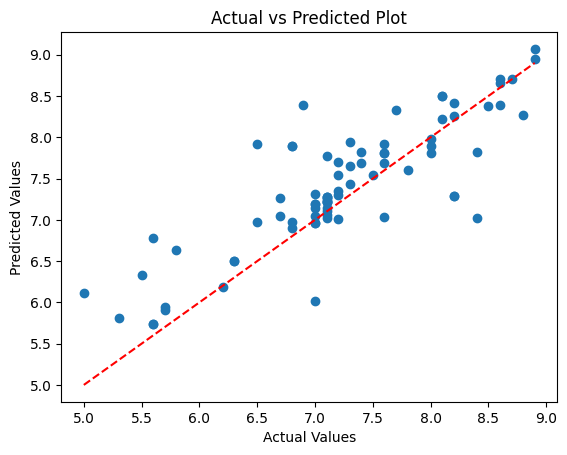

In [50]:
y_pred=classifier.predict(X_test)



plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Plot')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()